# Example Usage

In [1]:
import requests as req
import pandas as pd
from datetime import datetime
from utils import plot_quotes, plot_price_impact

import sys

sys.path.insert(0, "../")
from src.configs import SYMBOL_TO_ADDRESS

In [2]:
url = "http://97.107.138.106/quotes"
params = {
    "start": str(int(datetime(2023, 12, 1).timestamp())),
    "end": str(int(datetime(2023, 12, 8).timestamp())),
}

res = req.get(url, params=params)
if res.status_code == 200:
    quotes = pd.DataFrame(res.json()).set_index(["src", "dst"])
else:
    print("Error:", res.status_code)

quotes.head()

in_amount  \
src                                        dst                                                        
0x0000000000085d4780b73119b644ae5ecd22b376 0x18084fba666a33d37592fa2633fd49a74dd93a88  7.586649e+20   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  1.511874e+21   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  3.368595e+21   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  7.106439e+21   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  1.147769e+22   

                                                                                         out_amount  \
src                                        dst                                                        
0x0000000000085d4780b73119b644ae5ecd22b376 0x18084fba666a33d37592fa2633fd49a74dd93a88  1.985904e+16   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  4.007228e+16   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  8.924959e+16   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  1.881544e+17   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  3.046132e+17   

                                                                                          price  \
src                                        dst                                                    
0x0000000000085d4780b73119b644ae5ecd22b376 0x18084fba666a33d37592fa2633fd49a74dd93a88  0.000026   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  0.000027   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  0.000026   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  0.000026   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  0.000027   

                                                                                       price_impact  \
src                                        dst                                                        
0x0000000000085d4780b73119b644ae5ecd22b376 0x18084fba666a33d37592fa2633fd49a74dd93a88      0.013688   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88      0.001302   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88      0.001695   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88      0.002373   
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88      0.000000   

                                                                                        timestamp  
src                                        dst                                                     
0x0000000000085d4780b73119b644ae5ecd22b376 0x18084fba666a33d37592fa2633fd49a74dd93a88  1701389684  
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  1701389686  
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  1701389687  
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  1701389688  
                                           0x18084fba666a33d37592fa2633fd49a74dd93a88  1701389690

In [3]:
in_token_sym = "USDC"
in_decimals = 6
out_token_sym = "WETH"

in_token = SYMBOL_TO_ADDRESS[in_token_sym]
out_token = SYMBOL_TO_ADDRESS[out_token_sym]

quotes_ = quotes.loc[(in_token, out_token)]

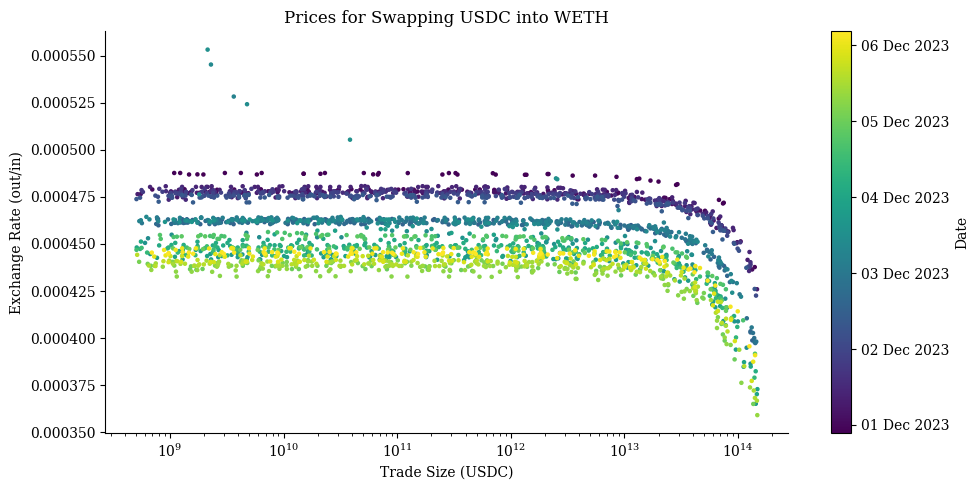

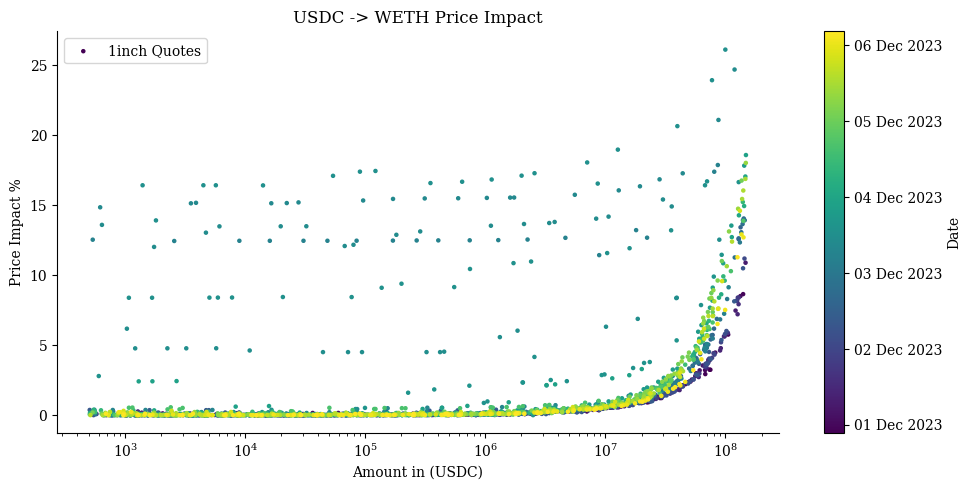

In [4]:
_ = plot_quotes(quotes_, in_token_sym, out_token_sym, fn="../figs/sample_quotes.png")
_ = plot_price_impact(
    quotes_,
    in_token_sym,
    out_token_sym,
    in_decimals,
    fn="../figs/sample_price_impact.png",
)